In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud

### Explanatory data analysis

Dataset loading

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

<AxesSubplot:>

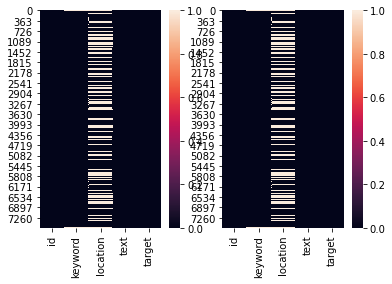

In [9]:
nans = train.isna()
nansTest = test.isna()
plt.subplot(1,2,1)
sns.heatmap(nans)
plt.subplot(1,2,2)
sns.heatmap(nans)

No handles with labels found to put in legend.


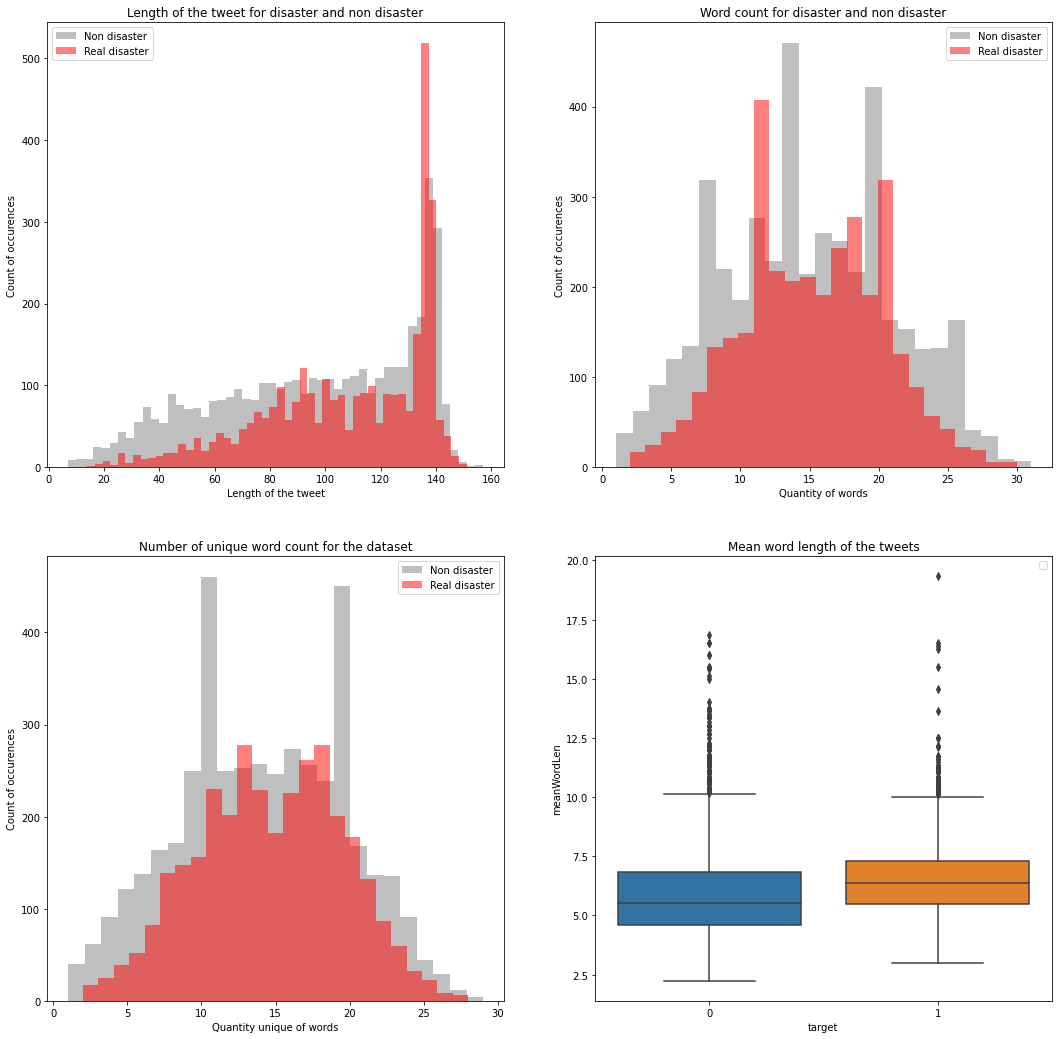

In [43]:
train['TweetLen'] = train['text'].map(lambda x: len(x))
train['WordCount'] = train['text'].map(lambda x: len(x.split()))
train['UniqueWordCnt'] = train['text'].map(lambda x: len(set(x.split())))
def meanWordLen(text):
    words = [len(word) for word in text.split()]
    return np.mean(words)
train['meanWordLen'] = train['text'].map(meanWordLen)
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (18,18))
ax[0,0].set_title('Length of the tweet for disaster and non disaster')
ax[0,0].set_xlabel('Length of the tweet')
ax[0,0].set_ylabel('Count of occurences')
ax[0,0].hist(train[train['target'] == 0]['TweetLen'],bins = 50, label = 'Non disaster', color = 'grey', alpha = 0.5)
ax[0,0].hist(train[train['target'] == 1]['TweetLen'],bins = 50, label = 'Real disaster', color = 'r', alpha = 0.5)
ax[0,0].legend()

ax[0,1].set_title('Word count for disaster and non disaster')
ax[0,1].set_xlabel('Quantity of words')
ax[0,1].set_ylabel('Count of occurences')
ax[0,1].hist(train[train['target'] == 0]['WordCount'],bins = 25, label = 'Non disaster', color = 'grey', alpha = 0.5)
ax[0,1].hist(train[train['target'] == 1]['WordCount'],bins = 25, label = 'Real disaster', color = 'r', alpha = 0.5)
ax[0,1].legend()

ax[1,0].set_title('Number of unique word count for the dataset')
ax[1,0].set_xlabel('Quantity unique of words')
ax[1,0].set_ylabel('Count of occurences')
ax[1,0].hist(train[train['target'] == 0]['UniqueWordCnt'],bins = 25, label = 'Non disaster', color = 'grey', alpha = 0.5)
ax[1,0].hist(train[train['target'] == 1]['UniqueWordCnt'],bins = 25, label = 'Real disaster', color = 'r', alpha = 0.5)
ax[1,0].legend()

ax[1,1].set_title('Mean word length of the tweets')
sns.boxplot(data=train, y = 'meanWordLen', x =  'target', ax = ax[1,1])

In [48]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

stop = set(stopwords.words('english'))
def removeStop(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(words)

In [51]:
train['textTreated'] = train['text'].map(remove_URL)
train['textTreated'] = train['textTreated'].map(remove_html)
train['textTreated'] = train['textTreated'].map(remove_emoji)
train['textTreated'] = train['textTreated'].map(remove_punct)
train['textTreated'] = train['textTreated'].map(removeStop)

In [52]:
train.head()

,id,keyword,location,text,target,TweetLen,WordCount,UniqueWordCnt,meanWordLen,textTreated
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,4.384615,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,4.571429,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,5.090909,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,8,7.125000,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,15,4.500000,got sent photo ruby alaska smoke wildfires pou...


In [58]:
def createCorpus(texts):
    words = []
    for text in texts:
        for word in text.split():
            words.append(word)
    return words
corpusNonDisaster = createCorpus(train[train['target'] == 0]['textTreated'])
corpusDisaster = createCorpus(train[train['target'] == 1]['textTreated'])

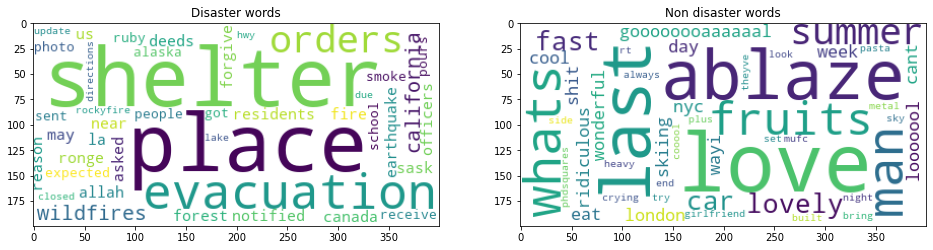

In [59]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusNonDisaster[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusDisaster[:50])
)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Disaster words')
plt.imshow(word_cloud1)
plt.subplot(1, 2, 2)
plt.title('Non disaster words')
plt.imshow(word_cloud0);